In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
cellphones_ratings = pd.read_csv("C:/Users/Meir/Desktop/Projects/Contrastive-Explanation-for-Recommender-Systems/datasets/cellphones ratings.csv", index_col=False)
cellphones = pd.read_csv("C:/Users/Meir/Desktop/Projects/Contrastive-Explanation-for-Recommender-Systems/datasets/cellphones data.csv", index_col='cellphone_id')

In [3]:
grouped_cellphones_by_mean = cellphones_ratings.groupby('cellphone_id').agg({'rating': 'mean'})
grouped_cellphones_by_mean.sort_values(by='rating',ascending=False, inplace=True)
grouped_cellphones_by_mean

,rating
cellphone_id,
2,8.000000
3,8.000000
1,7.750000
4,7.647059
0,7.500000
22,7.400000
25,7.394737
12,7.281250
20,7.266667


In [4]:
max_cell = grouped_cellphones_by_mean.iloc[0]
min_cell = grouped_cellphones_by_mean.iloc[-1]
print(f'{cellphones.iloc[max_cell.name]["model"]} with rating {max_cell["rating"]}')
print(f'{cellphones.iloc[min_cell.name]["model"]} with rating {min_cell["rating"]}')

iPhone 13 with rating 8.0
Moto G Play (2021) with rating 5.146341463414634


In [5]:
grouped_cellphones_by_var = cellphones_ratings.groupby('cellphone_id').agg({'rating': 'std'})
grouped_cellphones_by_var.sort_values(by='rating',ascending=False, inplace=True)
grouped_cellphones_by_var

,rating
cellphone_id,
26,3.354693
31,3.353701
11,3.006846
14,3.000475
8,2.992794
7,2.971125
30,2.954327
13,2.940266
28,2.713216


In [6]:
max_cell = grouped_cellphones_by_var.iloc[0]
min_cell = grouped_cellphones_by_var.iloc[-1]
print(f'{cellphones.iloc[max_cell.name]["model"]} with std {max_cell["rating"]}')
print(f'{cellphones.iloc[min_cell.name]["model"]} with std {min_cell["rating"]}')

12 Pro with std 3.35469346646877
iPhone 13 with std 1.6408253082847337


# sample image

In [7]:
def sample_between(p, q, num_samples: int = 500):
    samples = pd.DataFrame([p] * num_samples, columns=['a', 'b'])
    print(samples.columns)
    for col in samples.columns:
        p_value, q_value = p[col], q[col]

        low, high = sorted([p_value, q_value])
        samples[col] = np.random.randint(low, high + 1, size=num_samples)

    return samples

In [8]:
p = {'a':20, 'b':200}
q = {'a':60, 'b':50}
samples = sample_between(p, q, 150)

Index(['a', 'b'], dtype='object')


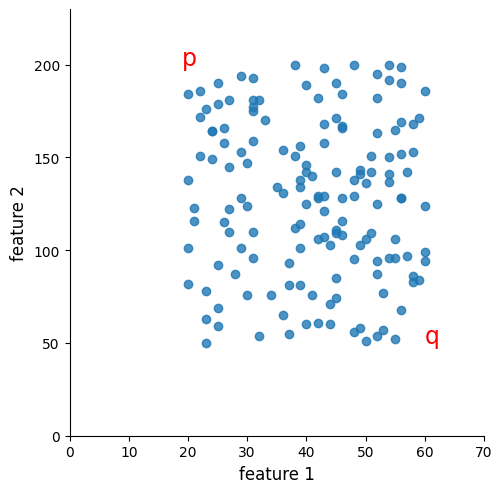

In [12]:
sns.lmplot(data=samples, x='a', y='b', fit_reg=False)

# control x and y limits
plt.ylim(0, 230)
plt.xlim(0, 70)
plt.xlabel("feature 1", size=12)
plt.ylabel("feature 2", size=12)

#add
# left, bottom, width, height = (10, 90, 73, 120)
# rect=mpatches.Rectangle((left,bottom),width,height, 
#                         #fill=False,
#                         alpha=0.1,
#                         linewidth=2,
#                         facecolor="purple")
# plt.gca().add_patch(rect)

# add text with text() function in matplotlib
plt.text(19, 200,'p', size=17, color="red")
plt.text(60, 50,'q', size=17, color="red")

 
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (150,) and arg 1 with shape (180,).

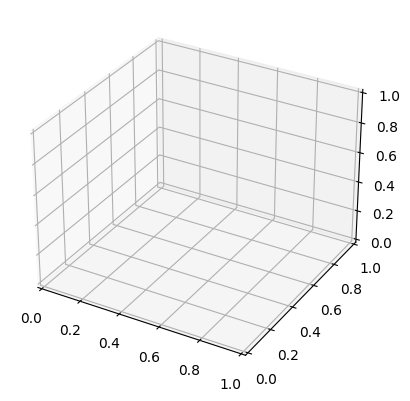

In [10]:
# import sklearn.linear_model
# from mpl_toolkits.mplot3d import Axes3D

# X_train = samples.to_numpy()
# # print(X_train)
# # print(samples.to_numpy())
# y_train = np.random.randint(1, 10 + 1, size=180)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_train[:,0], y_train, X_train[:,1], marker='.', color='red')
# ax.set_xlabel("X1")
# ax.set_ylabel("X2")
# ax.set_zlabel("y")

# model = sklearn.linear_model.LinearRegression()
# model.fit(X_train, y_train)

# coefs = model.coef_
# intercept = model.intercept_
# xs = np.tile(np.arange(61), (61,1))
# ys = np.tile(np.arange(61), (61,1)).T
# zs = xs*coefs[0]+ys*coefs[1]+intercept
# print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
#                                                           coefs[1]))
# for angle in range(0, 360*4 + 1):
#     # Normalize the angle to the range [-180, 180] for display
#     angle_norm = (angle + 180) % 360 - 180

#     # Cycle through a full rotation of elevation, then azimuth, roll, and all
#     elev = azim = roll = 0
#     if angle <= 360:
#         elev = angle_norm
#     elif angle <= 360*2:
#         azim = angle_norm
#     elif angle <= 360*3:
#         roll = angle_norm
#     else:
#         elev = azim = roll = angle_norm

#     # Update the axis view and title
#     ax.view_init(elev, azim, roll)
    
# ax.plot_surface(xs,ys,zs, alpha=0.5)
# plt.show()